In [15]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#read data from csv
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\FAOSTAT_data - FAOSTAT_data_en_12-29-2024.csv")
df.head()

In [ ]:
#remove unwanted columns
df.drop('Year Code', axis=1,inplace=True)
#Year code and Year are redundant datas
df.head()

In [ ]:
#checking the info of the dataset
df.info()

In [ ]:
#checking the missing values in the dataset
missing_data=df.isnull().sum()

percentage=(missing_data/len(df))*100
print(missing_data)
print(percentage)

In [27]:
#removing the columns with high null values
df.drop('Note',axis=1,inplace=True)

In [28]:
#checking the duplicates in the dataset

df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [29]:
df.shape

(224647, 13)

In [30]:
#filling the null values with mean and mode values

for column in df.columns:
    if df[column].dtype in ['int64','float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

print(df.isnull().sum())

C:\Users\Admin\AppData\Local\Temp\ipykernel_24528\4033957369.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24528\4033957369.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [31]:
#seperating the needed columns from the dataset
pro_col=['Area','Item','Element','Value','Year']
filtered_data=df[pro_col]
print(filtered_data)

               Area                    Item         Element          Value  \
0       Afghanistan       Almonds, in shell  Area harvested   29203.000000   
1       Afghanistan       Almonds, in shell           Yield    1308.300000   
2       Afghanistan       Almonds, in shell      Production   38205.000000   
3       Afghanistan       Almonds, in shell  Area harvested   22134.000000   
4       Afghanistan       Almonds, in shell           Yield    1775.900000   
...             ...                     ...             ...            ...   
224642     Zimbabwe  Whole milk, evaporated      Production    5010.210000   
224643     Zimbabwe  Whole milk, evaporated      Production    4795.700000   
224644     Zimbabwe  Whole milk, evaporated      Production    4921.050000   
224645     Zimbabwe  Whole milk, evaporated      Production    4966.370000   
224646     Zimbabwe                    Wine      Production  898484.835892   

        Year  
0       2019  
1       2019  
2       2019  
3  

In [ ]:
print(filtered_data.info())

In [ ]:
data=df[pro_col]
data

In [ ]:
#pivot table
pivot_data=data.pivot_table(index=['Area','Item','Year'],
columns='Element',
values='Value').reset_index()
pivot_data

In [ ]:
#checking outliers
for column in pivot_data.columns:
    if pivot_data[column].dtype in ('int64', 'float64'):
        Q1=pivot_data[column].quantile(0.25)
        Q3=pivot_data[column].quantile(0.75)

        IQR=Q3-Q1

        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        outliers=pivot_data[(pivot_data[column]<lower_bound) | (pivot_data[column]>upper_bound)]
        print('lower bound:',lower_bound)
        print('higher bound:',upper_bound)
        print(outliers[[column]])
        
    else:
        print('error')

In [40]:
pivot_data.to_csv("D:\\Projects\\Crop_Production\\Cleaned_Crop_data.csv",index=False)
print('its completed')

its completed


C:\Users\Admin\AppData\Local\Temp\ipykernel_24528\239846875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_counts.head(10).values, y=crop_counts.head(10).index, palette='viridis')


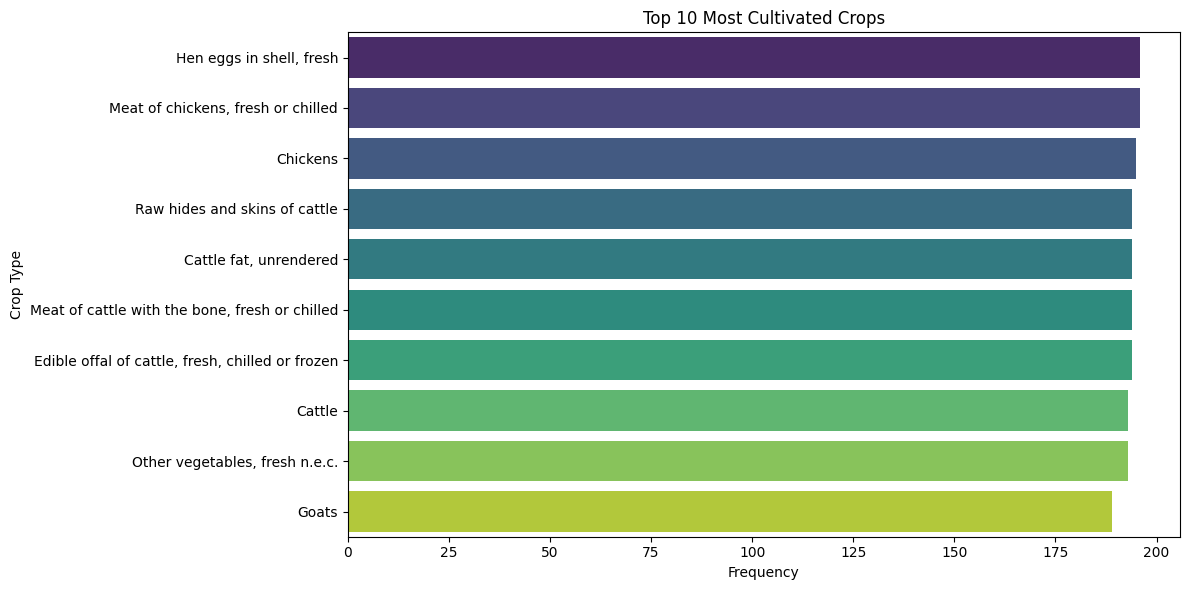

In [ ]:
crop_counts = pivot_data.groupby('Item')['Area'].nunique().sort_values(ascending=False)



# Plot the top 10 most cultivated crops
plt.figure(figsize=(12, 6))
sns.barplot(x=crop_counts.head(10).values, y=crop_counts.head(10).index, palette='viridis')
plt.title("Top 10 Crops cultivated in most Areas")
plt.xlabel("No. of Countries")
plt.ylabel("Crop Type")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24528\1210769685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_ha.head(10).values, y=area_ha.head(10).index, palette='viridis')


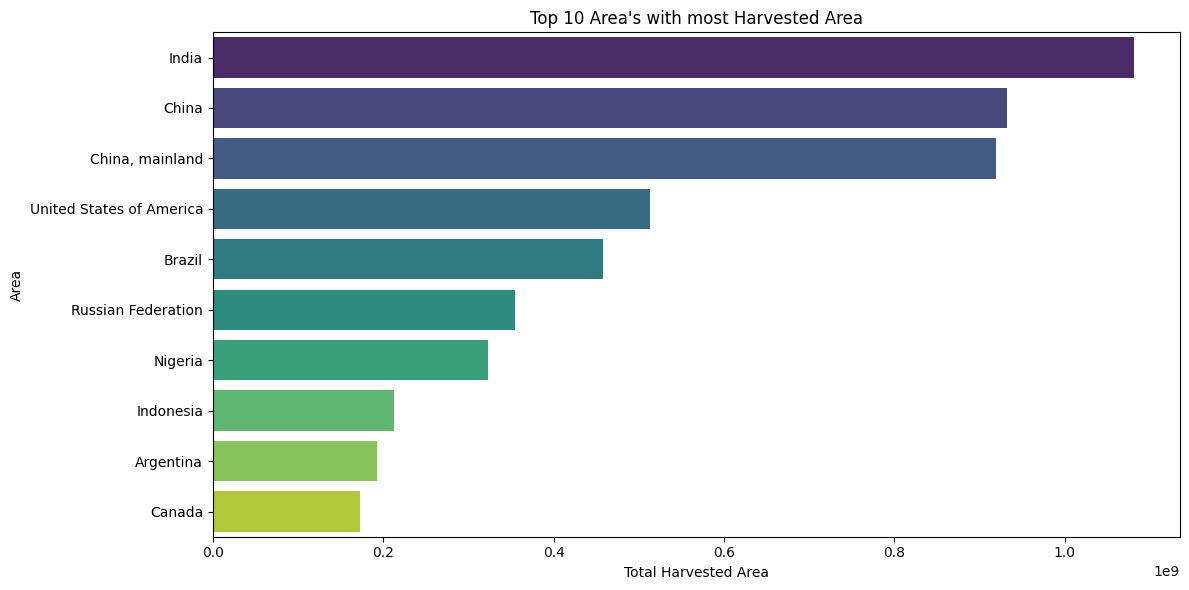

In [45]:
area_ha = pivot_data.groupby('Area')['Area harvested'].sum().sort_values(ascending=False)
# Plot the top 10 most cultivated crops
plt.figure(figsize=(12, 6))
sns.barplot(x=area_ha.head(10).values, y=area_ha.head(10).index, palette='viridis')
plt.title("Top 10 Area's with most Harvested Area")
plt.xlabel("Total Harvested Area")
plt.ylabel("Area")
plt.tight_layout()
plt.show()

In [ ]:
region_crop = pivot_data.groupby('Area')['Item'].nunique().sort_values(ascending=False)

region_data=pd.DataFrame(region_crop)

plt.figure(figsize=(12,6))
sns.barplot(x='Area',y='Item',data=region_data.head(10),color='skyblue')
plt.title("Top 10 Regions by Crop Diversity")
plt.xlabel("Region")
plt.ylabel("Number of Unique Crops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
